# Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 &amp; compiled
into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and
price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales
of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. 

Multi-outlet reporting includes an aggregation of the following channels: 
grocery, mass, club, drug, dollarand military. 

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost,
even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of
avocados (e.g. greenskins) are not included in this table.
S
ome relevant columns in the dataset:



In [1]:
#Date - The date of the observation
#AveragePrice - the average price of a single avocado
#type - conventional or organic
# year - the year
# Region - the city or region of the observation
# Total Volume - Total number of avocados sold
# 4046 - Total number of avocados with PLU 4046 sold
# 4225 - Total number of avocados with PLU 4225 sold
# 4770 - Total number of avocados with PLU 4770 sold


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [27]:
!pip install imbalanced-learn

In [28]:
#importing Train dataset

df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


 # Exploratory Data Analysis


In [29]:
#preprocessing data

df.shape

(18249, 14)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

<AxesSubplot:>

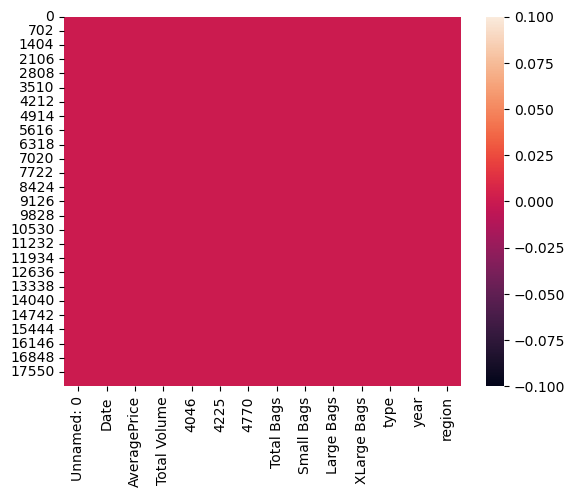

In [9]:
#lets visualize it using heatmap

sns.heatmap(df.isnull())

In [31]:
# we will change the date column into date type

df['Date']=pd.to_datetime(df['Date'])

In [32]:
#Checking the datatypes again
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [33]:
#now we have to separate date and month into seperate column

df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df.drop('Date',axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
 14  Day           18249 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 2.1+ MB


In [35]:
#lets check unique value in each column

df.nunique().sort_values()

type                2
year                4
Month              12
Day                31
Unnamed: 0         53
region             54
AveragePrice      259
XLarge Bags      5588
4770            12071
Large Bags      15082
Small Bags      17321
4046            17702
Total Bags      18097
4225            18103
Total Volume    18237
dtype: int64

In [36]:
#checking the value counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4

In [37]:
#checking for duplicate values

df.drop_duplicates(inplace=True)
df.shape

(18249, 15)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [38]:
#Target variable is Average price

df['AveragePrice'].unique()

df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

#  Data Visualization 

In [70]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['type', 'region']
Numerical Columns: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


In [ ]:
#Remove unwanted columns

df.drop('Unnamed: 0',axis=1,inplace=True)

In [47]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


# Univariate Analysis


2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


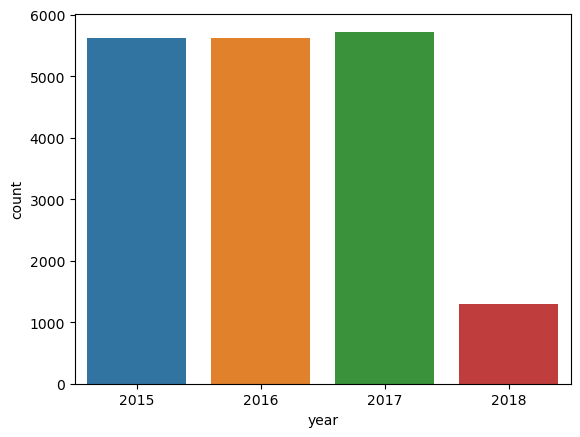

In [41]:
#visualize the count of the year

ax=sns.countplot(x= 'year',data=df)
print(df['year'].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

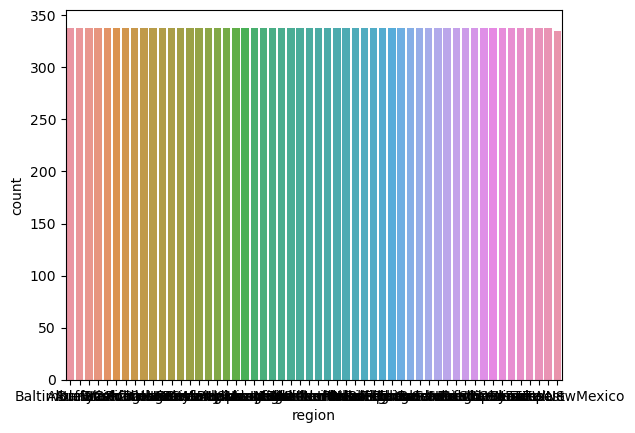

In [42]:
#visualize the count of Region

ax=sns.countplot(x= 'region',data=df)
print(df['region'].value_counts())

Bivariant 

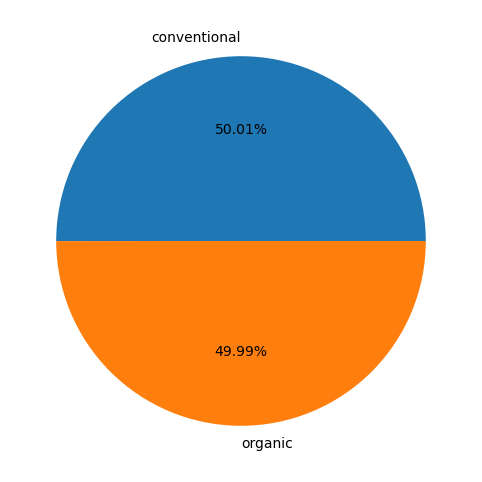

In [44]:
#visualize the count of the type of Avacados in conventional and organic 


labels='conventional','organic'
fig, ax =plt.subplots(figsize=(10,6))
ax.pie(df["type"].value_counts(),labels=labels,autopct='%1.2f%%')
plt.show()



<AxesSubplot:title={'center':'Comparison between Average Price and type'}, xlabel='type', ylabel='AveragePrice'>

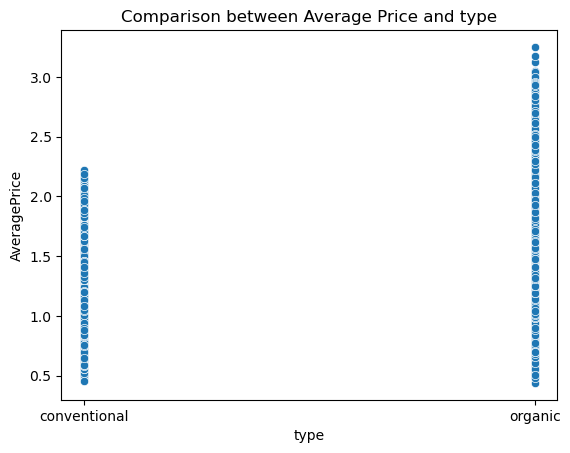

In [45]:
#when we Comparing two set of data plot: 

plt.title("Comparison between Average Price and type")
sns.scatterplot(x="type", y = "AveragePrice",data = df)

<AxesSubplot:title={'center':'Comparision between small bag and total bags'}, xlabel='Total Bags', ylabel='Small Bags'>

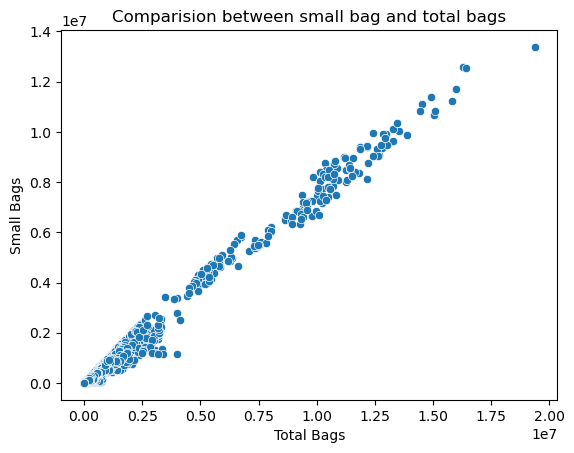

In [48]:
#when we are comparing two data plot:

plt.title("Comparision between small bag and total bags")
sns.scatterplot(x="Total Bags", y ="Small Bags",data=df)


categorical Columns: ['type', 'region']
Numerical Columns: ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']

<AxesSubplot:title={'center':'Comparison between Large Bag and Total Bags'}, xlabel='Total Bags', ylabel='Large Bags'>

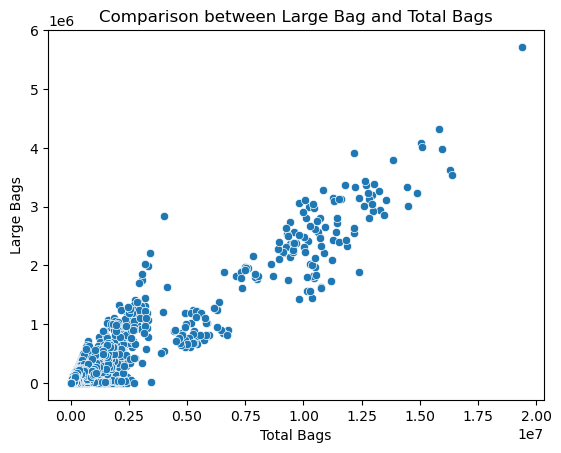

In [49]:
#when we Comparing two set of data plot: 

plt.title("Comparison between Large Bag and Total Bags")
sns.scatterplot(x="Total Bags", y = "Large Bags",data = df)

<AxesSubplot:title={'center':'Comparison between Xlarge bags and Total Bags'}, xlabel='Total Bags', ylabel='XLarge Bags'>

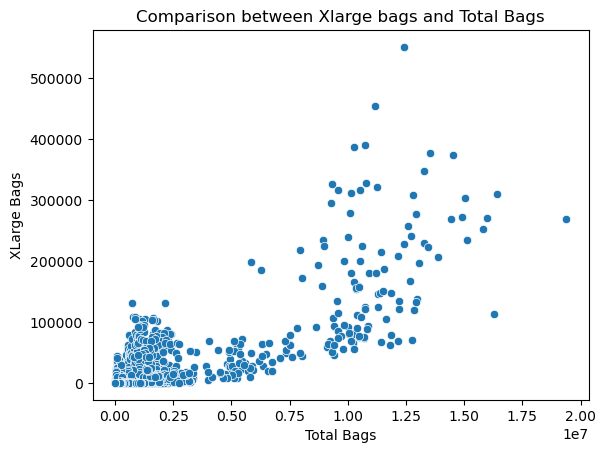

In [50]:
#when we Comparing two set of data plot: 

plt.title("Comparison between Xlarge bags and Total Bags")
sns.scatterplot(x="Total Bags", y = "XLarge Bags",data = df)

<AxesSubplot:title={'center':'Comparison between Average Price and month'}, xlabel='Month', ylabel='AveragePrice'>

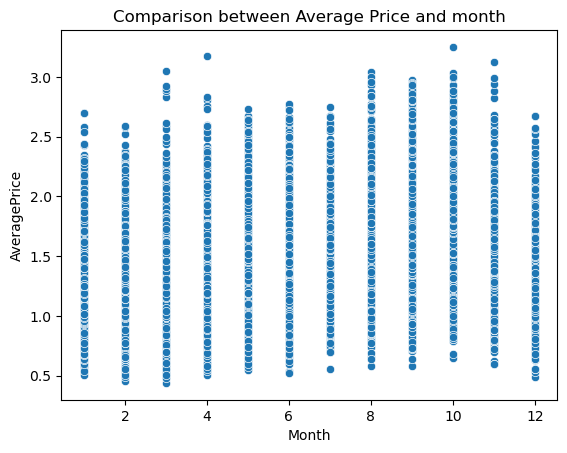

In [73]:
#when we Comparing two set of data plot: 

plt.title("Comparison between Average Price and month")
sns.scatterplot(x="Month", y = "AveragePrice",data = df)

In [53]:
#Now we will compare total avacados according to number using scatter plot of Average price
# 4046 - Total number of avocados with PLU 4046 sold
# 4225 - Total number of avocados with PLU 4225 sold
# 4770 - Total number of avocados with PLU 4770 sold


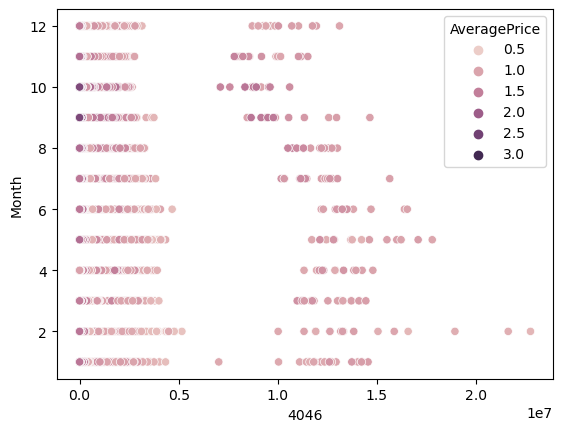

In [54]:
# Comparing Month vs 4046 and Average price as hue
sns.scatterplot(x = "4046", y = "Month",hue='AveragePrice',data=df)
plt.show()

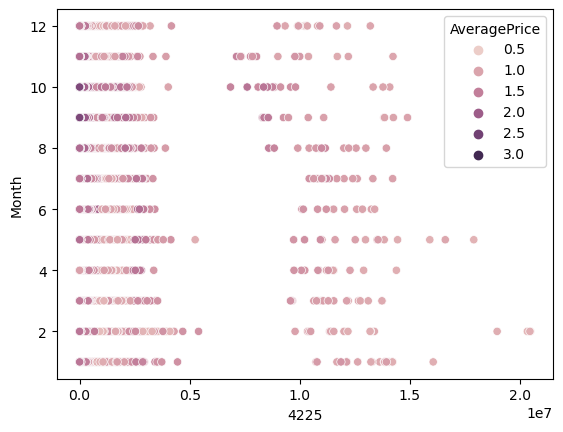

In [56]:
# Comparing Month vs 4225 and Average price as hue

sns.scatterplot(x = "4225", y = "Month",hue='AveragePrice',data=df)
plt.show()

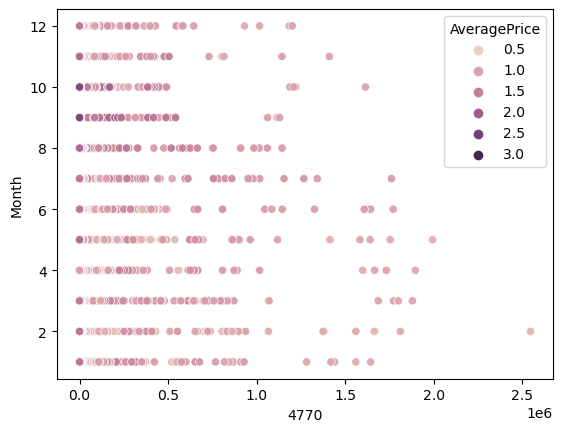

In [57]:
# Comparing Month vs 4770 and Average price as hue

sns.scatterplot(x = "4770", y = "Month",hue='AveragePrice',data=df)
plt.show()

In [ ]:
plt.title("Comparision between year and Total Volume")
plt.figure(figsize=(8,6))
sns.boxplot(x='Total Volume', y='year',data=df, hue= 'AveragePrice', palette = 'bright')
plt.show()

In [62]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


#  Multvariant Analysis


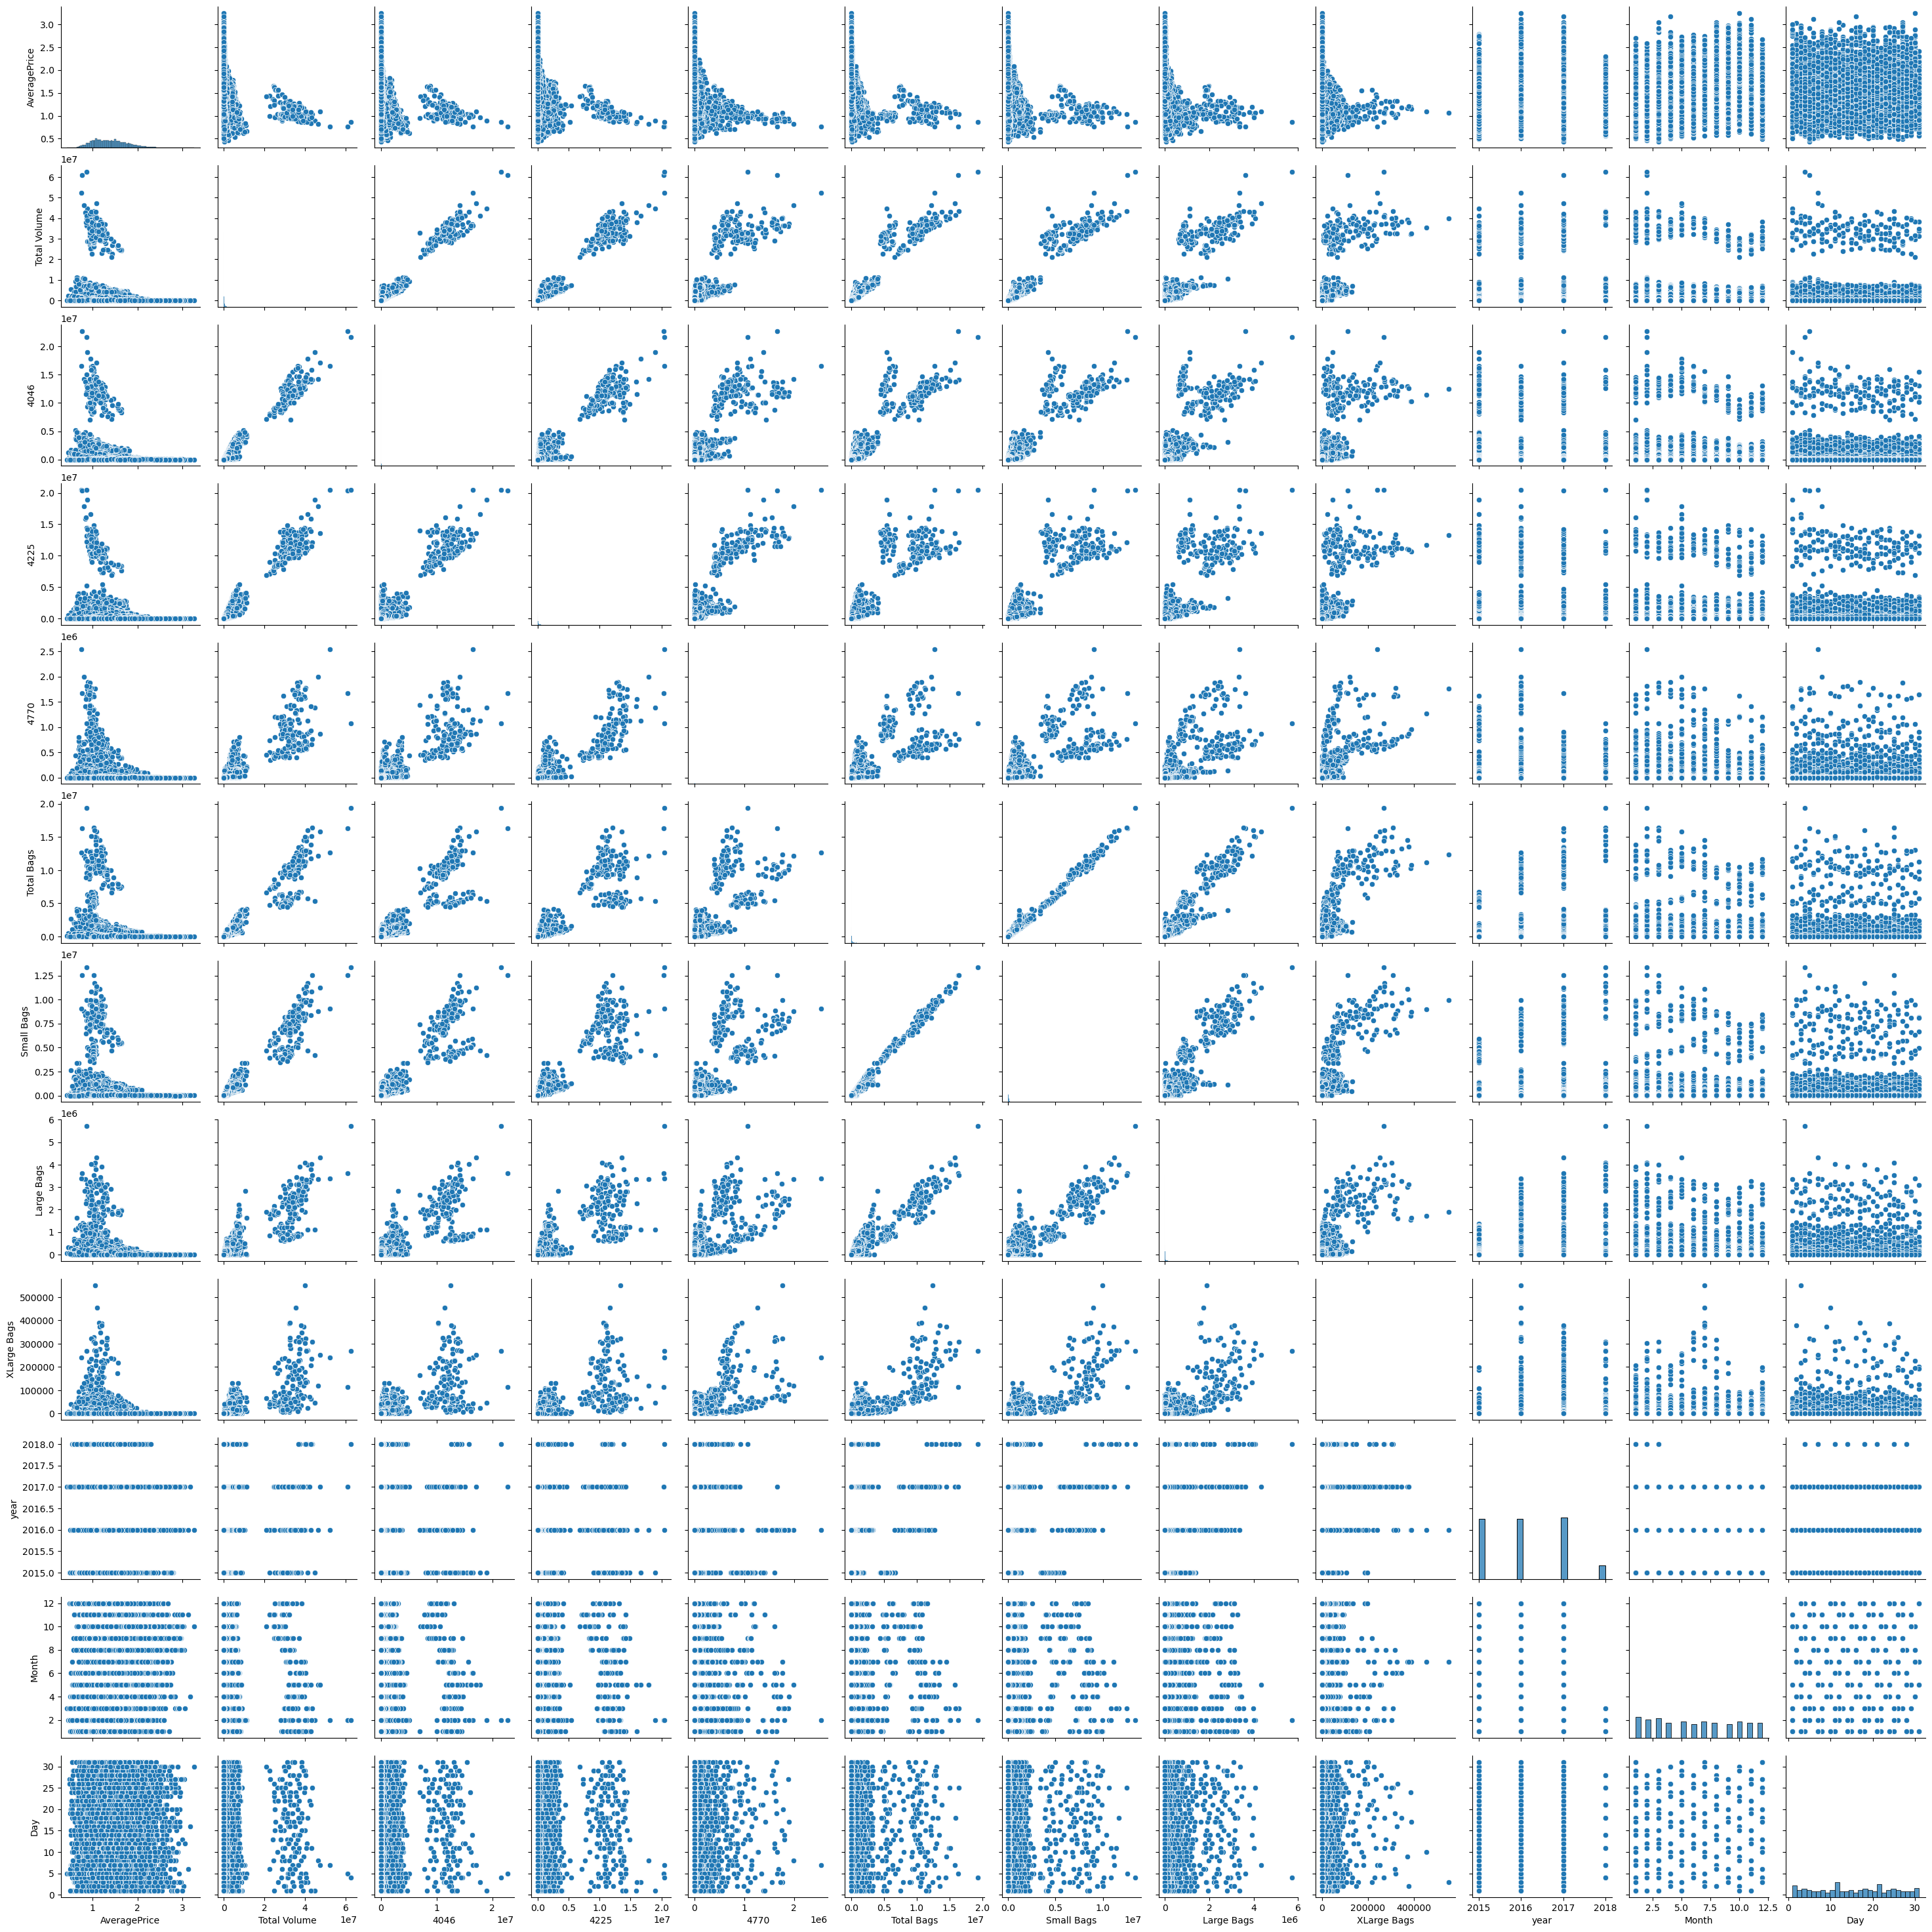

In [64]:
sns.pairplot(df)

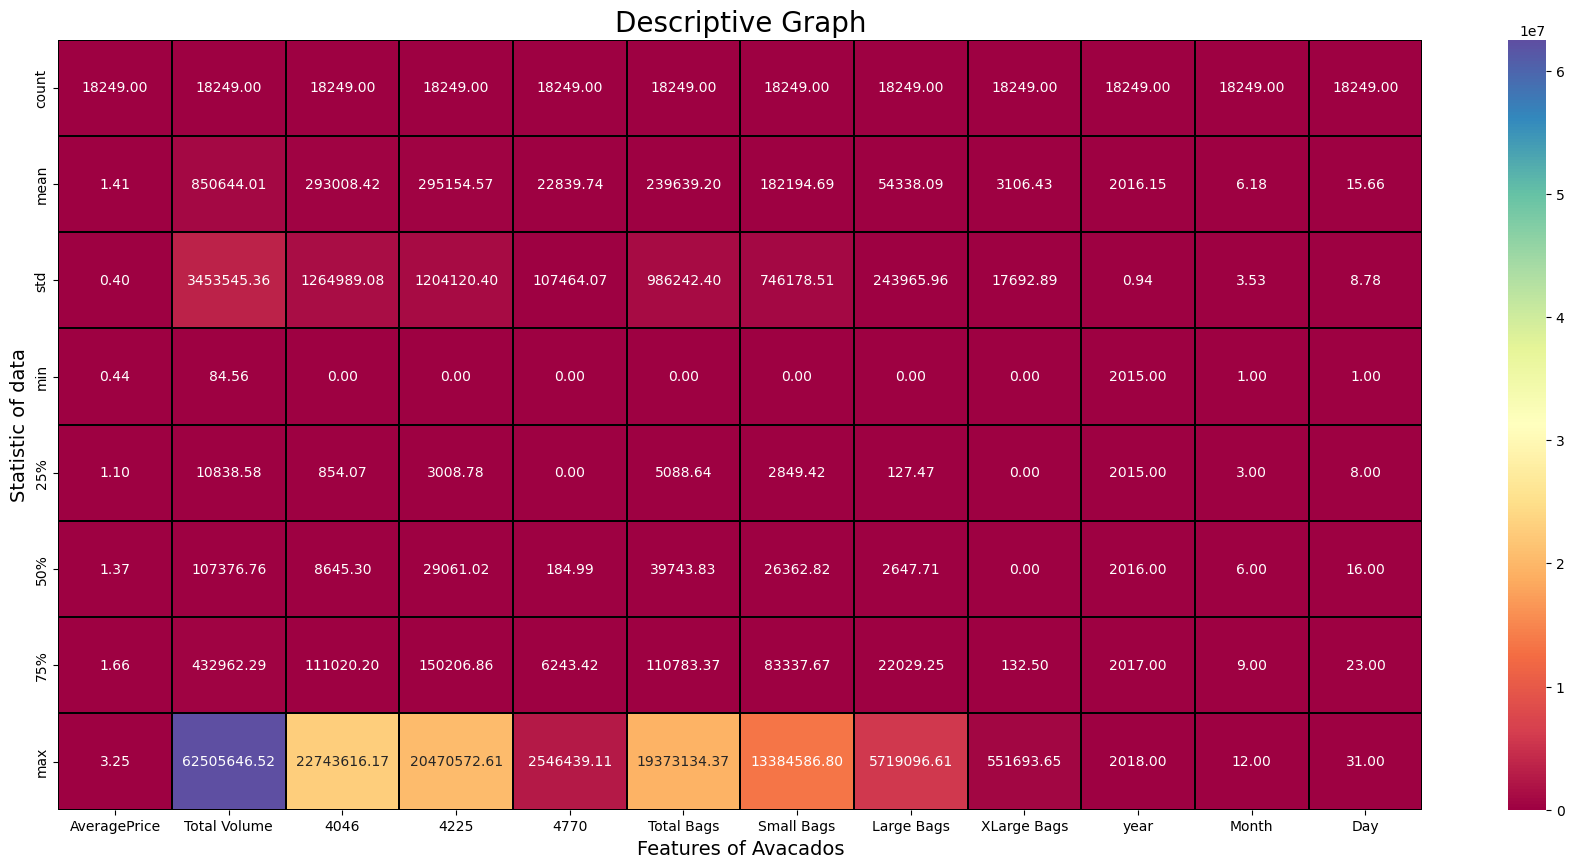

In [65]:
#Descriptive Graph of features and target variable of the team 

plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Features of Avacados',fontsize=14)
plt.ylabel('Statistic of data',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect.

From the above description we can observe the following:

1. The counts of all the columns are same which means there are no missing values in the data set. 

2. The mean value is greater than the median(50%)  column which means the data is skewed to right in these column.

3. By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data

4. We can also notice the Standard deviation, min 25% values from the described method. 

# Visualizing the correlation between label and features using bar plot 


<AxesSubplot:>

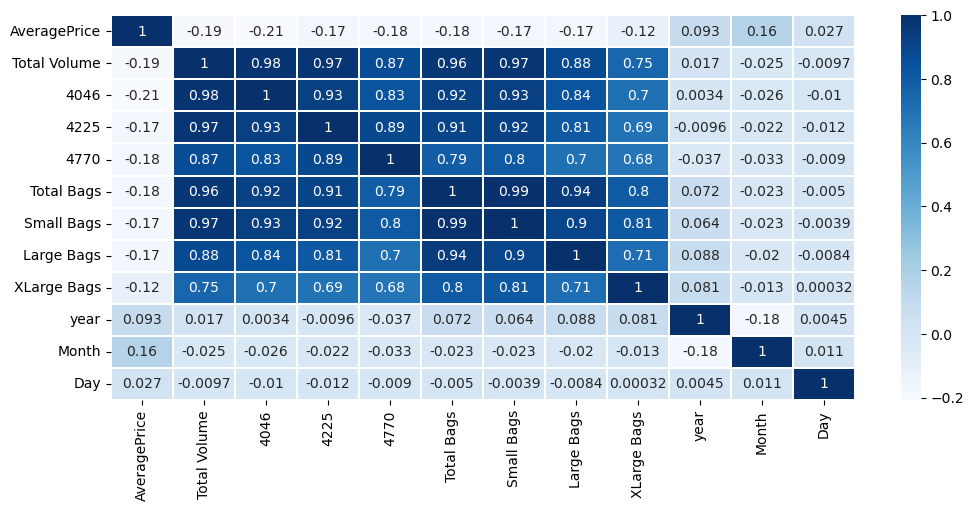

In [72]:
#Correlation map to display the most correlated variables:

cor = df.corr(method ="pearson")
f, ax=plt.subplots(figsize = (12,5))
sns.heatmap(df.corr(),cmap="Blues",annot=True, ax= ax,linewidth=.25)

We see the correlation map and it shows the highest and lowest with Average price-
Average price has the highest correlation with year then with day and -.19 with Total Volume 

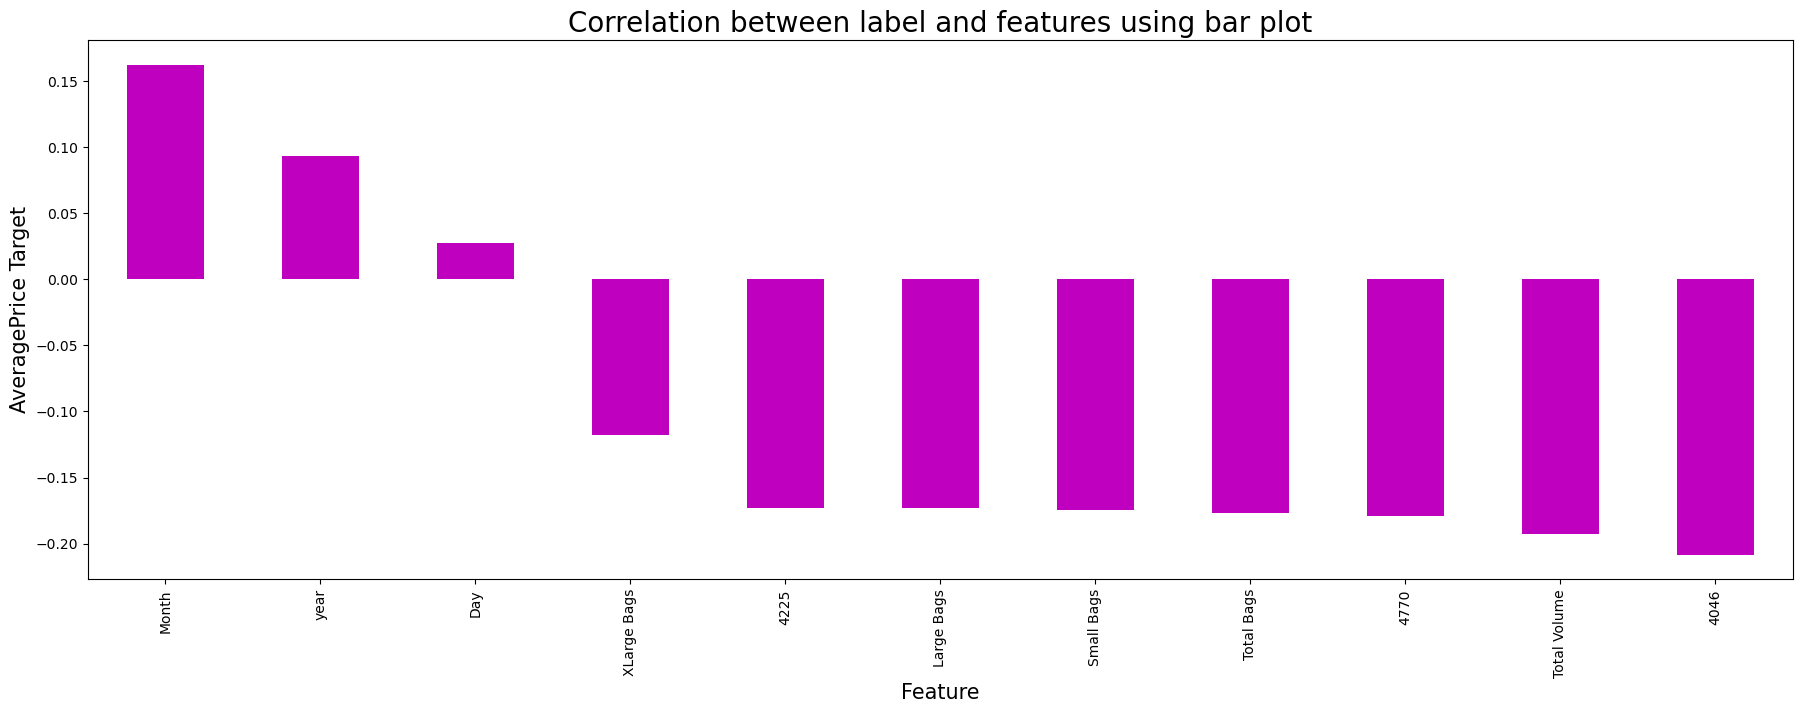

In [81]:
plt.figure(figsize = (22,7))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('AveragePrice Target',fontsize = 15)
plt.title("Correlation between label and features using bar plot",fontsize=20)                                                        
plt.show()

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

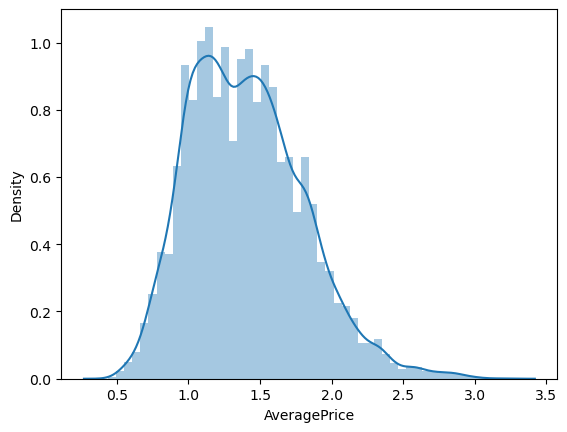

In [82]:
#Analyze the Target variable

sns.distplot(df.AveragePrice)

# Checking how the data has been distributed in each column


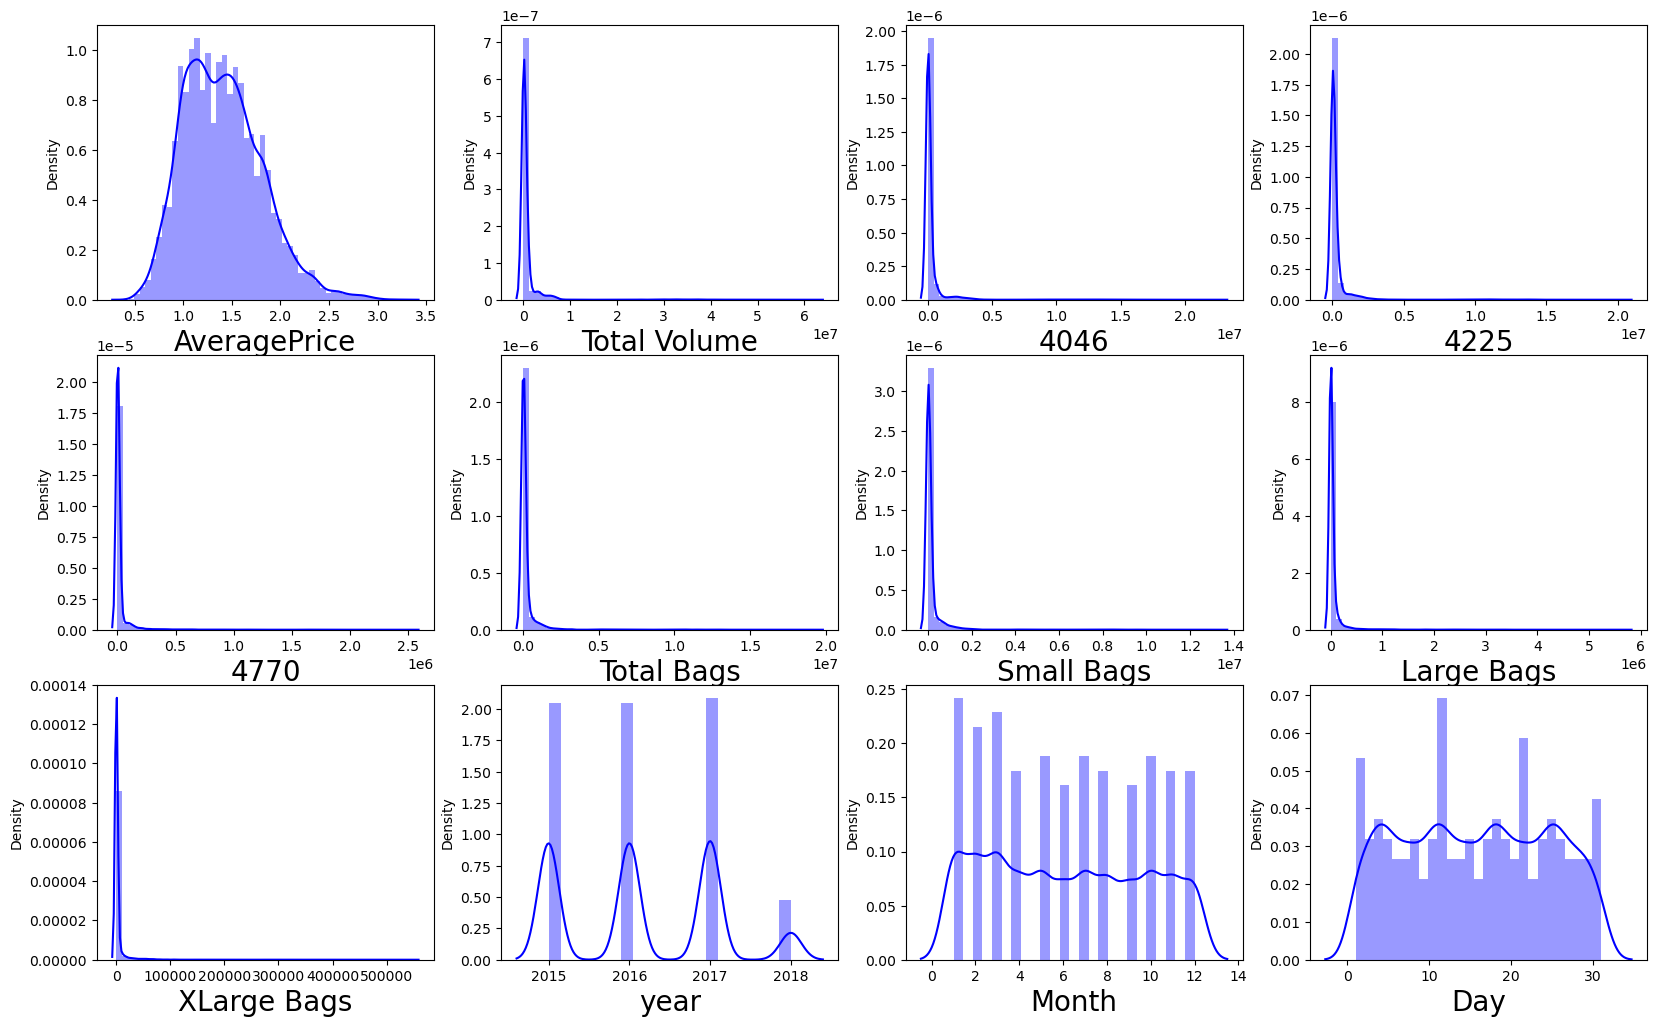

In [99]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

In [76]:
df1=df

In [98]:
df1.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness Average 0.58 column and the all the columns is more than 0.5 so the weight in the left tail of the distribution. 

The skewness of year,day,month column is lower than 0.5 , which indicate that skewness is on the right side. 

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

# Checking for outliers:

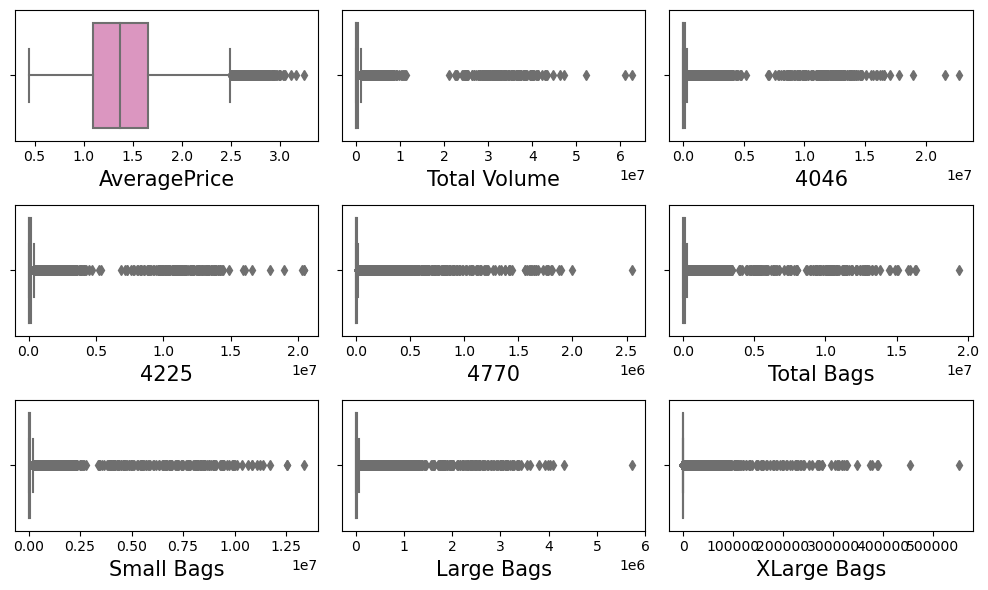

In [83]:
#lets check the outliers by plotting boxplot of categorical column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Z- score method

In [84]:
# Removing the outliers using zscore and IQR techniques before building the models and selected best one. 

from scipy.stats import zscore
out_features=df1[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
z=np.abs(zscore(out_features))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [85]:
#threshold =3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [93]:
df2=df1[(z<3).all(axis=1)]
df2.shape


(17651, 14)

In [87]:
#shape of old and new dataframe

print("old data frame",df1.shape[0])
print("new data frame",df2.shape[0])

old data frame 18249
new data frame 17651


In [88]:
print("Data loss percentage",((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data loss percentage 3.276891884486821


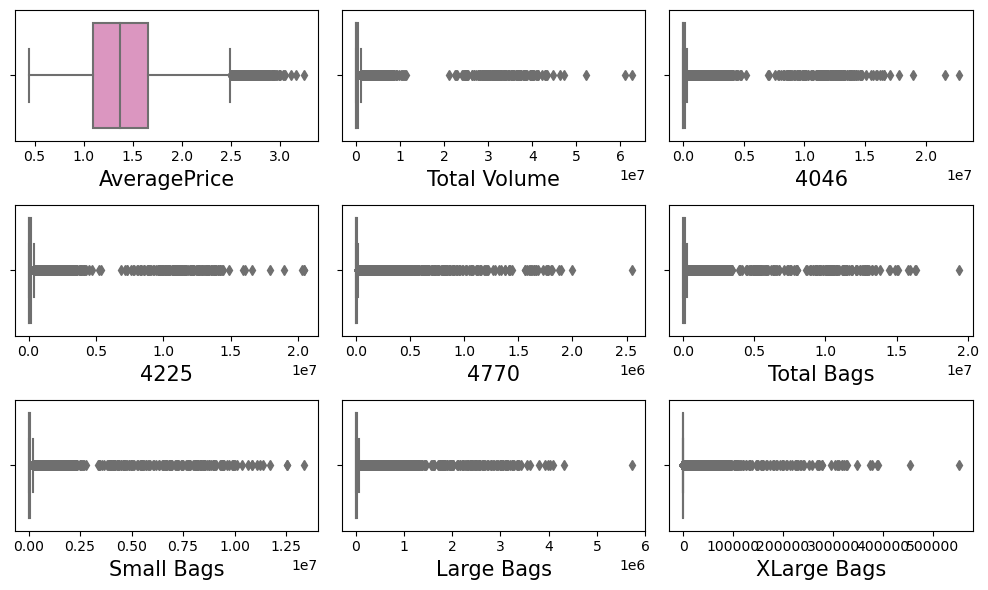

In [94]:
# Rechecking outlier

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

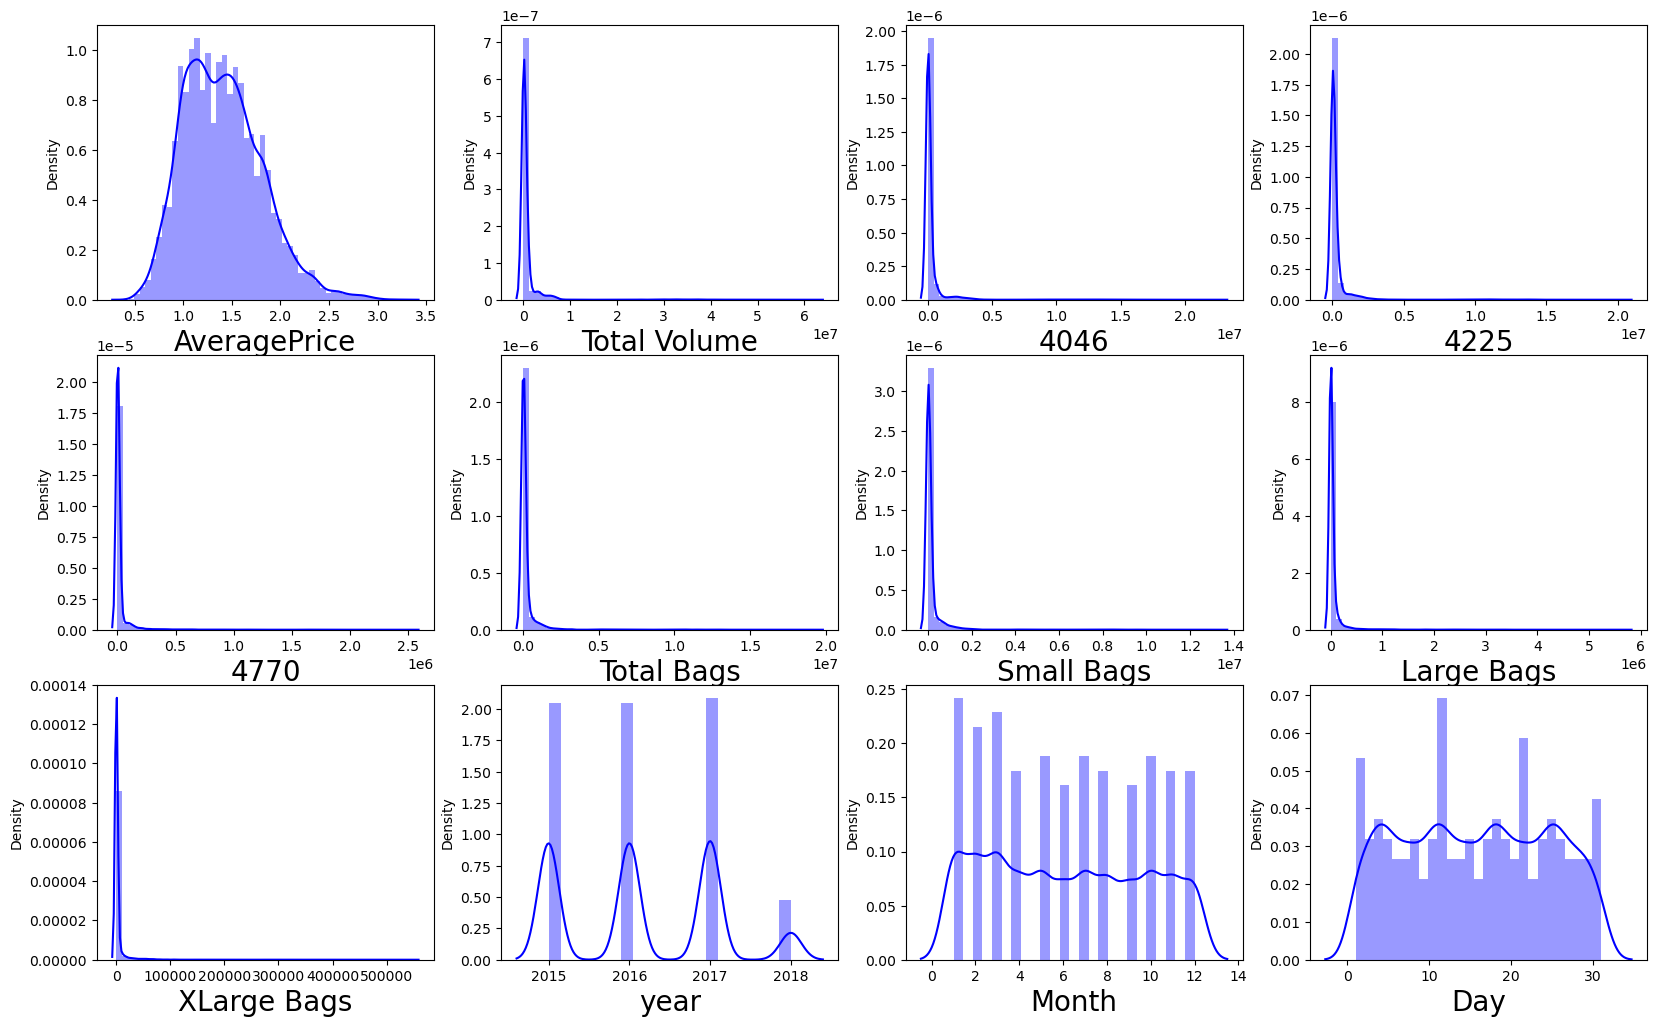

In [100]:
#checking skewness and if the data is distributed in each column normally

#Plotting feature variable column 

plt.figure(figsize=(20,25),facecolor="white")
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()   

In [97]:
# we see many skewness in the data distributed in the graphs. 
df2.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
Day             0.011778
dtype: float64

In [102]:
#removing skewness using yeo- johnson method

Skew_data = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer

sk = PowerTransformer(method='yeo-johnson')
df2[Skew_data] = sk.fit_transform(df2[Skew_data].values)
df2[Skew_data].head()


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919


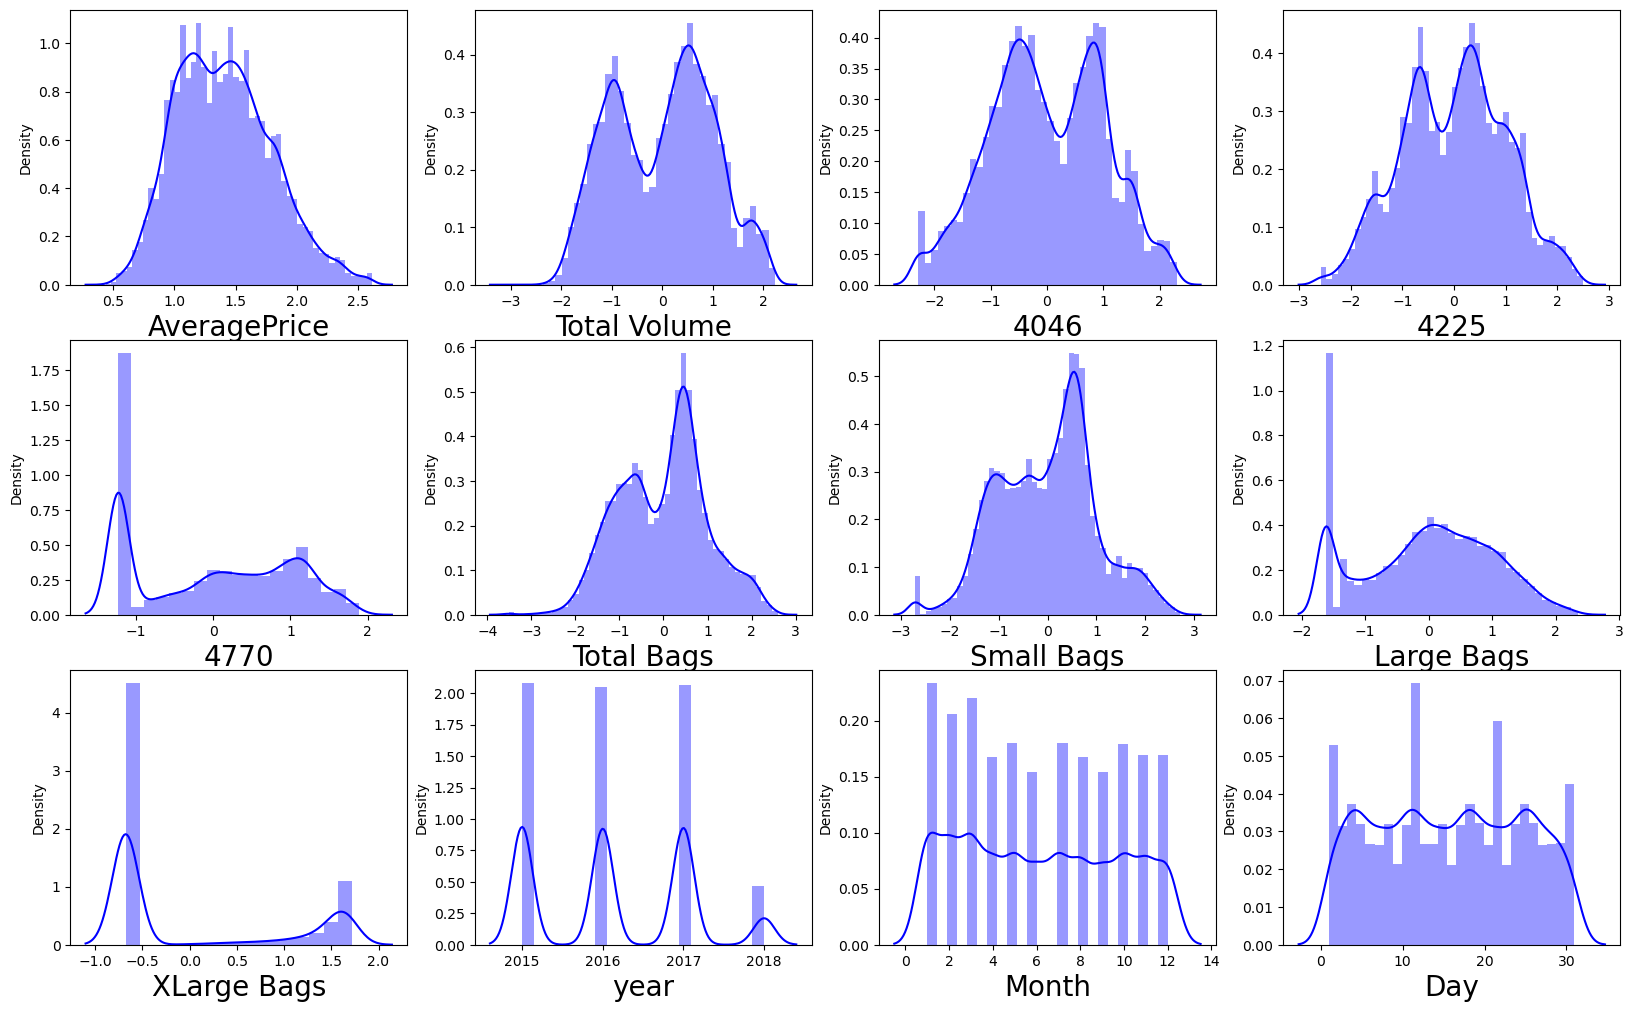

In [105]:
#Recheck skewness

plt.figure(figsize=(20,25),facecolor="white")
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()   


There is still skewness in the large bag so we will remove it using cube root method



In [106]:
df2['XLarge Bags']=np.cbrt(df2['XLarge Bags'])


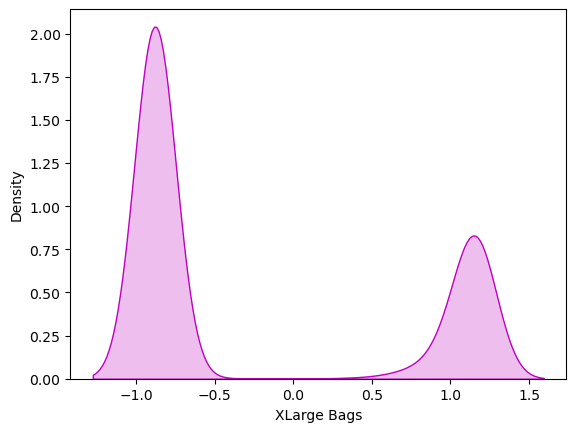

In [107]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['XLarge Bags'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [108]:
df2.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.772538
year            0.229976
Month           0.107408
Day             0.011778
dtype: float64

In [111]:
#Let change the categorical column into encoding by using label encoder

from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df2[categorical_col]=df2[categorical_col].apply(LE.fit_transform)
df2[categorical_col]




,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


In [112]:
df2.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.580126,-0.554612,-0.453664,-0.493607,-0.564105,-0.489430,-0.484384,-0.400140,0.613150,0.091704,-0.003242,0.149502,0.026819
Total Volume,-0.580126,1.000000,0.889248,0.924664,0.818545,0.941082,0.905795,0.682569,0.628940,-0.799821,0.080706,0.068983,-0.021861,-0.006430
4046,-0.554612,0.889248,1.000000,0.764456,0.737191,0.800798,0.779462,0.603598,0.575080,-0.725000,0.001350,0.162069,-0.021731,-0.005191
4225,-0.453664,0.924664,0.764456,1.000000,0.797186,0.820596,0.786441,0.616089,0.582023,-0.747349,-0.001524,0.033926,-0.021967,-0.006289
4770,-0.493607,0.818545,0.737191,0.797186,1.000000,0.761056,0.753593,0.547691,0.616665,-0.780137,-0.049934,0.041295,-0.013533,0.001251
Total Bags,-0.564105,0.941082,0.800798,0.820596,0.761056,1.000000,0.949975,0.729681,0.610880,-0.724752,0.214666,0.071460,-0.009209,-0.003164
Small Bags,-0.489430,0.905795,0.779462,0.786441,0.753593,0.949975,1.000000,0.566610,0.600631,-0.719063,0.190267,0.057312,-0.004761,-0.000222
Large Bags,-0.484384,0.682569,0.603598,0.616089,0.547691,0.729681,0.566610,1.000000,0.448599,-0.498894,0.191742,0.089954,-0.014694,-0.000130
XLarge Bags,-0.400140,0.628940,0.575080,0.582023,0.616665,0.610880,0.600631,0.448599,1.000000,-0.673184,0.155501,-0.015179,0.023181,0.011708
type,0.613150,-0.799821,-0.725000,-0.747349,-0.780137,-0.724752,-0.719063,-0.498894,-0.673184,1.000000,0.003867,0.018409,-0.009499,-0.002287


In [113]:
cor['AveragePrice'].sort_values

<bound method Series.sort_values of AveragePrice    1.000000
Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
year            0.093197
Month           0.162409
Day             0.027386
Name: AveragePrice, dtype: float64>

In [114]:
#To check the classification we will save the data

class_df=df2
class_df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,1.63,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.878468,1,2018,53,2,4
18245,1.71,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.878468,1,2018,53,1,28
18246,1.87,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.878468,1,2018,53,1,21
18247,1.93,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.878468,1,2018,53,1,14
18248,1.62,-0.667381,-0.359671,-0.791650,0.157768,-0.393236,-0.211755,-1.048116,-0.878468,1,2018,53,1,7


# Seperating features and label

In [115]:
#dropping irrelvant columns

new_df=df2

new_df.drop(["region","XLarge Bags"],axis=1,inplace=True)



In [117]:
#Seperating the independent and target variables into x and y

x = new_df.drop("AveragePrice",axis=1)
y = new_df['AveragePrice'].astype(int)

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (17651, 11)
Label Dimension (17651,)


# Feature Scaling using Standard Scalarization


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-1.019047,-1.210013,1.644612,1.289309
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-1.019047,-1.210013,1.644612,0.491652
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-1.019047,-1.210013,1.644612,-0.306004
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-1.019047,-1.210013,1.644612,-1.103660
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-1.019047,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,0.981309,1.980756,-1.180379,-1.331562
17647,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,0.981309,1.980756,-1.462878,1.403260
17648,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,0.981309,1.980756,-1.462878,0.605603
17649,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,0.981309,1.980756,-1.462878,-0.192053


# VIF to find multicolinearity


In [119]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,53.167294,Total Volume
1,6.846588,4046
2,11.315476,4225
3,3.886446,4770
4,35.019199,Total Bags
5,16.605329,Small Bags
6,3.457594,Large Bags
7,3.308231,type
8,1.340967,year
9,1.051234,Month


In [120]:
#drop the vif column total bag as its way high

x.drop("Total Bags",axis=1,inplace=True)

In [121]:
#Rechecking VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,37.310844,Total Volume
1,6.089172,4046
2,10.071544,4225
3,3.883082,4770
4,7.727936,Small Bags
5,2.114429,Large Bags
6,3.269323,type
7,1.311809,year
8,1.048424,Month
9,1.000676,Day


In [ ]:
#now VIF is less than or equal to 10


In [122]:
#Oversampling


from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(x,y)


In [123]:
y.value_counts()

1    13736
0    13736
2    13736
Name: AveragePrice, dtype: int64

## Creating train test split
 

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as KNN


In [131]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting


Since out r2 score using logistic regression gives us 56% We will use another accuracy method KNN neighbour to calculate the score


In [166]:
#Finding the best random state using KNeighbors regressor

from sklearn.neighbors import KNeighborsRegressor

maxAcc = 0
maxRS = 0

for i in range(200, 500):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    KNN = KNeighborsRegressor(n_neighbors=5)  
    KNN.fit(x_train, y_train)
    pred = KNN.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is", maxAcc, "at random_state", maxRS)

Max r2 score accuracy is 0.9097905029928773 at random_state 370


# Modeling


In [137]:
#Checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(r2_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.933401078635482
[[3335   98    0]
 [ 164 3113  148]
 [   0   48 3396]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3433
           1       0.96      0.91      0.93      3425
           2       0.96      0.99      0.97      3444

    accuracy                           0.96     10302
   macro avg       0.96      0.96      0.96     10302
weighted avg       0.96      0.96      0.96     10302



In [138]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(r2_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.5895005349082223
[[2873  551    9]
 [ 860 1710  855]
 [  11  477 2956]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      3433
           1       0.62      0.50      0.55      3425
           2       0.77      0.86      0.81      3444

    accuracy                           0.73     10302
   macro avg       0.72      0.73      0.72     10302
weighted avg       0.72      0.73      0.72     10302



In [141]:
#Checking accuracy for support vector machine classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(r2_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7808633744621647
[[3220  211    2]
 [ 592 2261  572]
 [   0  124 3320]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3433
           1       0.87      0.66      0.75      3425
           2       0.85      0.96      0.90      3444

    accuracy                           0.85     10302
   macro avg       0.86      0.85      0.85     10302
weighted avg       0.86      0.85      0.85     10302



In [ ]:
#Checking accuracy for KNeighbour regressor
#r2_score(y, np.argmax(y_train))

knn= KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(r2_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))



#  Cross Validation Score

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. 

In [146]:
from sklearn.model_selection import cross_val_score


In [160]:
#Checking cv score for Random Forest Classifier

score = cross_val_score(RFC,X,y)

print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predRFC)-score.mean())
print('Accuracy_Score:',r2_score(y_test,predRFC))
print('MAE:',mean_absolute_error(y_test, predRFC))
print('MSE:',mean_squared_error(y_test, predRFC))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFC)))


Difference between Accuracy score and cross validation score is - 0.17351128323719212
Accuracy_Score: 0.933401078635482
MAE: 0.04445738691516211
MSE: 0.04445738691516211
RMSE: 0.2108492042080361


In [161]:
#Checking cv score for Logistic Regression

LR = LogisticRegression()

score = cross_val_score(LR, X, y, cv=5)
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predLR)-score.mean())
print('Accuracy_Score:',r2_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predLR)))

Difference between Accuracy score and cross validation score is - 0.08262981504619482
Accuracy_Score: 0.5895005349082223
MAE: 0.2701417200543584
MSE: 0.27402446126965635
RMSE: 0.5234734580374217


In [162]:
svc=SVC()
svc.fit(x_train,y_train)

# prediction

predsvc=svc.predict(x_test)
print('Accuracy_Score:',r2_score(y_test,predsvc))
print('MAE:',mean_absolute_error(y_test, predsvc))
print('MSE:',mean_squared_error(y_test, predsvc))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predsvc)))


Accuracy_Score: 0.7808633744621647
MAE: 0.14589400116482237
MSE: 0.14628227528635215
RMSE: 0.38246865922105583


In [168]:
# Checking R2 score for KNN Regressor
from sklearn.neighbors import KNeighborsRegressor as KNN

knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))



R2_Score: 0.9015044245198433
MAE: 0.09946614899296287
MSE: 0.06541616112594031
RMSE: 0.25576583260072155


# Hyperparameter Tuning

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()

# hyperparameters we are using is knn regressor to tune our hyperparameters

param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']}

# GridSearchCV object with the KNeighborsRegressor, the parameter grid, and cross-validation folds (cv)

grid = GridSearchCV(knn, param_grid, cv=5)


In [ ]:
# Fitting our GridSearchCV Object
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [185]:
#Create a final model using logistic fit

Final_model =KNeighborsRegressor()

Final_model.fit(x_train,y_train)

#predict the target variable using the test data
y_prediction= Final_model.predict(x_test)
y_prediction
acc = r2_score(y_test,pred)
print(acc*100)

90.15044245198432


# saving the model


In [186]:
import joblib
joblib.dump(Final_model,"Avacado_model.pkl")

['Avacado_model.pkl']

# Predicting the saved model


In [187]:
#Lets load the saved model and get the prediction

model = joblib.load("Avacado_model.pkl")

#Prediction
y_prediction = model.predict(x_test)
y_prediction


array([2. , 0.2, 0.6, ..., 0. , 0. , 0. ])

In [176]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=y_prediction
df["Original"]=a
df

,Predicted,Original
0,2.0,2
1,0.2,1
2,0.6,1
3,1.0,1
4,2.0,2
...,...,...
8237,1.0,1
8238,0.2,0
8239,0.0,0
8240,0.0,0


# Final Analysis


The average price, the total exchanges and the total volume are well distributed with no outlier in the dataset

The price of Avacado is higher in the August and October, organic price more than conventional one. 

The regression and classification techniques have been used. 

Thank you!